<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Introduction-to-RNN-and-LSTM" data-toc-modified-id="Introduction-to-RNN-and-LSTM-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction to RNN and LSTM</a></span></li><li><span><a href="#Useful-Scripts" data-toc-modified-id="Useful-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Modelling-Functions" data-toc-modified-id="Modelling-Functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelling Functions</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#SMAPE-predictions" data-toc-modified-id="SMAPE-predictions-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>SMAPE predictions</a></span></li></ul></li></ul></div>

# Data Description

Reference: https://www.kaggle.com/c/web-traffic-time-series-forecasting/data

```
Original data: train_1.csv
-----------------------------
rows = 145,063
columns = 551
first column = Page
date columns = 2015-07-01, 2015-07-02, ..., 2016-12-31 (550 columns)
file size: 284.6 MB


Cleaned data: data_cleaned_2016_frac01.csv
----------------------------------------------
selected year: 2016 (leap year 366 days)
fraction     : 0.1  (only 10% of total data is taken at random)
cleaning     : the date columns are melted and made rows
filesize     : 1.14 GB

columns: Page date       visits     year      month       day      quarter 
              dayofweek  dayofyear  day_name  month_name  weekend  weekday                 
              mean       median     name      project     access   agent                 
              lang       language
              
              
Data for modelling: most_visited_2016.csv
--------------------------------------------------------------------
timeseries  : Now You See Me es (Spain, random_state=42)
columns     : visits	month	day	quarter	dayofweek	weekend	
lag columns : lag1 to lag7
bias        : bias column

For ARIMA   : we have only one timeseries (one column)
For sklearn : For linear regressor, ensemble learners we can have many columns
```

# Introduction to RNN and LSTM
References: 
- https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru
- https://www.youtube.com/watch?v=UNmqTiOnRfg&t=3s
- https://medium.com/deep-math-machine-learning-ai/chapter-10-1-deepnlp-lstm-long-short-term-memory-networks-with-math-21477f8e4235
- https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
- https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
**Recurrent Neural Networks** 

In a recurrent neural network we store the output activations from one or more of the layers of the network. Often these are hidden later activations. Then, the next time we feed an input example to the network, we include the previously-stored outputs as additional inputs. You can think of the additional inputs as being concatenated to the end of the “normal” inputs to the previous layer. For example, if a hidden layer had 10 regular input nodes and 128 hidden nodes in the layer, then it would actually have 138 total inputs (assuming you are feeding the layer’s outputs into itself à la Elman) rather than into another layer). Of course, the very first time you try to compute the output of the network you’ll need to fill in those extra 128 inputs with 0s or something.

![](../images/rnn.png)

Now, even though RNNs are quite powerful, they suffer from Vanishing gradient problem which hinders them from using long term information, like they are good for storing memory 3-4 instances of past iterations but larger number of instances don't provide good results so we don't just use regular RNNs. Instead, we use a better variation of RNNs: Long Short Term Networks(LSTM).

**What is Vanishing Gradient problem?**  
Vanishing gradient problem is a difficulty found in training artificial neural networks with gradient-based learning methods and backpropagation. In such methods, each of the neural network's weights receives an update proportional to the partial derivative of the error function with respect to the current weight in each iteration of training. The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value. In the worst case, this may completely stop the neural network from further training. As one example of the problem cause, traditional activation functions such as the hyperbolic tangent function have gradients in the range (0, 1), and backpropagation computes gradients by the chain rule. This has the effect of multiplying n of these small numbers to compute gradients of the "front" layers in an n-layer network, meaning that the gradient (error signal) decreases exponentially with n while the front layers train very slowly.

![](../images/vanishing_gradient.png)

**Long Short Term Memory(LSTM)**  
Long short-term memory (LSTM) units (or blocks) are a building unit for layers of a recurrent neural network (RNN). A RNN composed of LSTM units is often called an LSTM network. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell is responsible for "remembering" values over arbitrary time intervals; hence the word "memory" in LSTM. Each of the three gates can be thought of as a "conventional" artificial neuron, as in a multi-layer (or feedforward) neural network: that is, they compute an activation (using an activation function) of a weighted sum. Intuitively, they can be thought as regulators of the flow of values that goes through the connections of the LSTM; hence the denotation "gate". There are connections between these gates and the cell.

The expression long short-term refers to the fact that LSTM is a model for the short-term memory which can last for a long period of time. An LSTM is well-suited to classify, process and predict time series given time lags of unknown size and duration between important events. LSTMs were developed to deal with the exploding and vanishing gradient problem when training traditional RNNs.

![](../images/lstm.png)


**Components of LSTMs**  
So the LSTM cell contains the following components

- Forget Gate “f” ( a neural network with sigmoid)
- Candidate layer “C"(a NN with Tanh)
- Input Gate “I” ( a NN with sigmoid )
- Output Gate “O”( a NN with sigmoid)
- Hidden state “H” ( a vector )
- Memory state “C” ( a vector)

- Inputs to the LSTM cell at any step are Xt (current input) , Ht-1 (previous hidden state ) and Ct-1 (previous memory state).

- Outputs from the LSTM cell are Ht (current hidden state ) and Ct (current memory state)

**Working of gates in LSTMs**  
First, LSTM cell takes the previous memory state Ct-1 and does element wise multiplication with forget gate (f) to decide if present memory state Ct. If forget gate value is 0 then previous memory state is completely forgotten else f forget gate value is 1 then previous memory state is completely passed to the cell ( Remember f gate gives values between 0 and 1 ).

Ct = Ct-1 * ft

Calculating the new memory state:

Ct = Ct + (It * C`t)

Now, we calculate the output:

Ht = tanh(Ct)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (12,8)})
plt.style.use('fivethirtyeight') # better than sns styles.
matplotlib.rcParams['figure.figsize'] = 12,8

import os
import time

# random state
random_state=100
np.random.seed(random_state)

# Jupyter notebook settings for pandas
#pd.set_option('display.float_format', '{:,.2g}'.format) # numbers sep by comma
from pandas.api.types import CategoricalDtype
np.set_printoptions(precision=3)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 200)

import IPython
from IPython.display import display, HTML, Image, Markdown

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.17.4'), ('pandas', '0.25.3'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.1')]


In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
import tensorflow
import keras

from keras import optimizers
from keras.optimizers import SGD
from keras.models import Model, Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

from keras.utils import plot_model

from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import RepeatVector, TimeDistributed, Flatten

print([(x.__name__,x.__version__) for x in [tensorflow, keras]])

[('tensorflow', '2.0.0'), ('keras', '2.3.1')]


Using TensorFlow backend.


In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [5]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [6]:
import sys
sys.path.append('../models')

from util_prophet import smape, smape_fast

In [7]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# Useful Scripts

In [8]:
def show_method_attributes(obj, ncols=7,start=None, inside=None):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """
    lst = [elem for elem in dir(obj) if elem[0]!='_' ]
    lst = [elem for elem in lst 
           if elem not in 'os np pd sys time psycopg2'.split() ]

    if isinstance(start,str):
        lst = [elem for elem in lst if elem.startswith(start)]
        
    if isinstance(start,tuple) or isinstance(start,list):
        lst = [elem for elem in lst for start_elem in start
               if elem.startswith(start_elem)]
        
    if isinstance(inside,str):
        lst = [elem for elem in lst if inside in elem]
        
    if isinstance(inside,tuple) or isinstance(inside,list):
        lst = [elem for elem in lst for inside_elem in inside
               if inside_elem in elem]

    return pd.DataFrame(np.array_split(lst,ncols)).T.fillna('')

# Load the data

In [9]:
%%time

df_raw = pd.read_csv('../../data/wiki/train_1.csv',encoding='latin-1')

print(df_raw.shape) # (145063, 551) we have 145k data and 551 columns
df_raw.head()

(145063, 551)
CPU times: user 5.68 s, sys: 632 ms, total: 6.31 s
Wall time: 6.41 s


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,...,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,10.0,5.0,9.0,9.0,9.0,9.0,13.0,4.0,15.0,25.0,...,13.0,8.0,15.0,14.0,12.0,6.0,11.0,10.0,42.0,21.0,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,12.0,27.0,27.0,36.0,23.0,58.0,80.0,60.0,69.0,42.0,...,12.0,11.0,14.0,28.0,23.0,20.0,9.0,12.0,11.0,14.0,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,4.0,5.0,0.0,0.0,7.0,3.0,5.0,1.0,6.0,2.0,...,6.0,4.0,2.0,4.0,6.0,5.0,4.0,4.0,3.0,3.0,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,8.0,27.0,19.0,16.0,2.0,84.0,22.0,14.0,47.0,25.0,...,38.0,13.0,14.0,17.0,26.0,14.0,10.0,9.0,23.0,15.0,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,11.0,8.0,6.0,10.0,14.0,6.0,9.0,6.0,16.0,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [10]:
df_sample = df_raw.sample(5, random_state=42) # I like 100 but use 42 here.
df_sample

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,...,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
83529,Phabricator/Project_management_www.mediawiki.org_all-access_spider,6.0,6.0,4.0,6.0,8.0,6.0,4.0,0.0,2.0,3.0,2.0,3.0,3.0,7.0,1.0,4.0,1.0,6.0,2.0,3.0,8.0,4.0,5.0,6.0,3.0,4.0,3.0,5.0,7.0,6.0,5.0,3.0,5.0,2.0,6.0,3.0,8.0,5.0,4.0,2.0,1.0,3.0,4.0,1.0,9.0,2.0,2.0,8.0,5.0,...,4.0,5.0,5.0,10.0,6.0,5.0,5.0,7.0,4.0,6.0,7.0,19.0,10.0,3.0,7.0,13.0,11.0,10.0,7.0,10.0,18.0,6.0,6.0,5.0,8.0,7.0,4.0,10.0,14.0,6.0,4.0,6.0,3.0,7.0,12.0,5.0,9.0,7.0,9.0,23.0,6.0,6.0,11.0,4.0,6.0,5.0,7.0,6.0,6.0,9.0
70433,Now_You_See_Me_es.wikipedia.org_desktop_all-agents,242.0,271.0,309.0,227.0,321.0,311.0,242.0,236.0,243.0,266.0,381.0,347.0,336.0,344.0,267.0,286.0,277.0,325.0,238.0,303.0,268.0,371.0,285.0,266.0,298.0,312.0,303.0,246.0,355.0,272.0,289.0,314.0,400.0,355.0,312.0,277.0,375.0,287.0,349.0,469.0,306.0,309.0,306.0,265.0,263.0,223.0,253.0,338.0,310.0,...,364.0,533.0,444.0,390.0,306.0,343.0,302.0,381.0,439.0,434.0,428.0,714.0,393.0,336.0,386.0,474.0,421.0,316.0,341.0,278.0,346.0,321.0,323.0,305.0,296.0,250.0,244.0,324.0,286.0,357.0,387.0,337.0,268.0,293.0,253.0,263.0,334.0,305.0,305.0,257.0,231.0,222.0,193.0,229.0,334.0,316.0,324.0,268.0,201.0,190.0
84729,ZÃ¼rich_Hackathon_2014_www.mediawiki.org_all-access_spider,3.0,19.0,19.0,30.0,21.0,24.0,17.0,178.0,40.0,1.0,3.0,2.0,4.0,11.0,7.0,13.0,14.0,24.0,7.0,11.0,8.0,3.0,8.0,9.0,4.0,1.0,5.0,4.0,2.0,7.0,3.0,2.0,2.0,9.0,2.0,2.0,5.0,3.0,6.0,3.0,7.0,6.0,11.0,20.0,18.0,7.0,1.0,2.0,4.0,...,5.0,2.0,5.0,3.0,2.0,4.0,4.0,3.0,5.0,5.0,4.0,6.0,8.0,7.0,11.0,8.0,5.0,5.0,5.0,5.0,9.0,7.0,5.0,3.0,8.0,10.0,3.0,7.0,5.0,1.0,7.0,8.0,6.0,7.0,5.0,2.0,10.0,6.0,5.0,10.0,6.0,7.0,4.0,8.0,2.0,4.0,9.0,4.0,11.0,12.0
7969,ÃrythrÃ©e_fr.wikipedia.org_desktop_all-agents,672.0,513.0,774.0,1164.0,546.0,755.0,555.0,494.0,4801.0,4514.0,1101.0,1113.0,747.0,923.0,601.0,554.0,381.0,322.0,323.0,657.0,417.0,612.0,991.0,728.0,556.0,777.0,663.0,602.0,676.0,855.0,462.0,315.0,1440.0,812.0,1178.0,1307.0,904.0,740.0,472.0,367.0,431.0,1053.0,790.0,1122.0,1312.0,598.0,599.0,756.0,890.0,...,415.0,348.0,460.0,542.0,435.0,439.0,360.0,602.0,367.0,488.0,466.0,463.0,500.0,391.0,347.0,347.0,460.0,433.0,396.0,383.0,376.0,306.0,327.0,386.0,356.0,335.0,301.0,366.0,256.0,361.0,388.0,14152.0,418.0,390.0,353.0,313.0,367.0,310.0,374.0,282.0,308.0,294.0,358.0,204.0,323.0,438.0,345.0,299.0,306.0,211.0
92077,Metallica_es.wikipedia.org_all-access_all-agents,1534.0,1644.0,1704.0,1569.0,1534.0,1577.0,1608.0,1731.0,1919.0,1628.0,1640.0,1646.0,1635.0,1690.0,2132.0,1635.0,1680.0,1638.0,1658.0,1651.0,1687.0,1607.0,1758.0,1778.0,1625.0,1725.0,1951.0,1802.0,1746.0,1771.0,1813.0,2014.0,2161.0,2075.0,2146.0,1808.0,1774.0,1875.0,1931.0,1867.0,1672.0,1836.0,2004.0,1907.0,1930.0,1659.0,1843.0,1741.0,1837.0,...,3394.0,3452.0,3406.0,3479.0,3711.0,8146.0,10561.0,8201.0,6535.0,5544.0,4764.0,5125.0,4927.0,4128.0,3830.0,3884.0,3467.0,3466.0,3165.0,3047.0,2929.0,2946.0,3123.0,3011.0,2856.0,2905.0,2792.0,2908.0,2596.0,265

In [11]:
ts = df_sample.iloc[1,1:].astype(np.float64)
ts.name = df_sample.iloc[1,0]

ts.index = pd.to_datetime(ts.index,format='%Y-%m-%d')
ts.head()

2015-07-01    242.0
2015-07-02    271.0
2015-07-03    309.0
2015-07-04    227.0
2015-07-05    321.0
Name: Now_You_See_Me_es.wikipedia.org_desktop_all-agents, dtype: float64

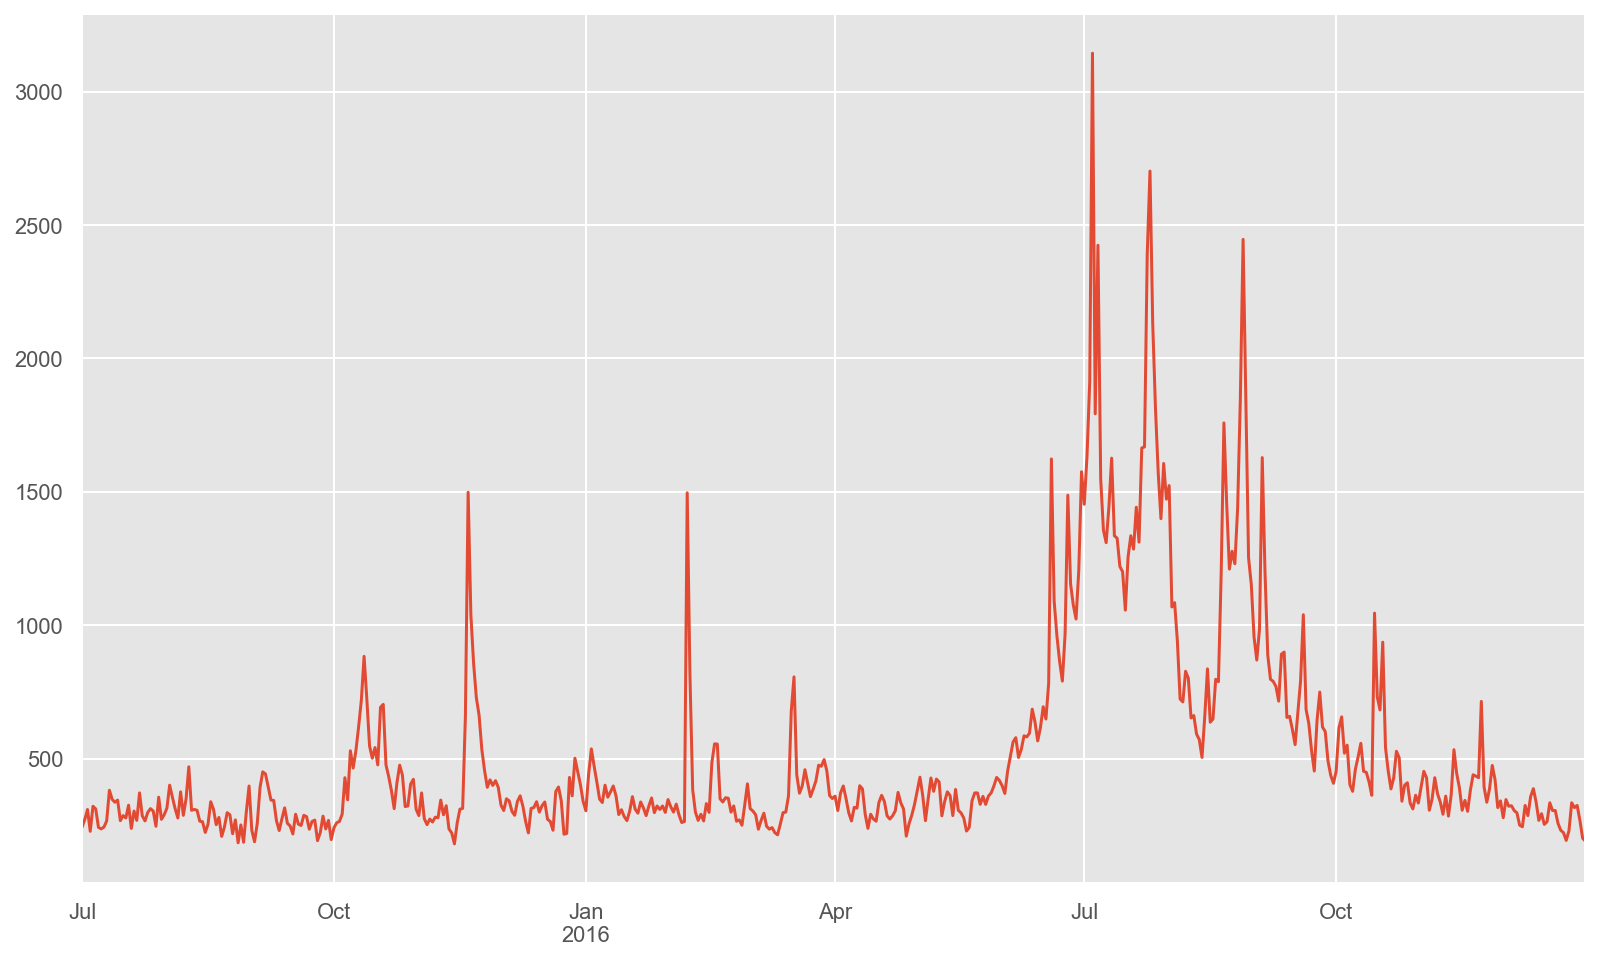

In [12]:
ts.plot()

In [13]:
iplot([{'x': ts.index,'y': ts.to_numpy()} ])

# Modelling Functions

In [14]:
def create_Xlag_y(x, lag=1):
    """Create Xlag and y array from 1d timeseries x.

    Parameters
    ----------
    x : 1d numpy array, shape = (n,1)
    lag : integer

    Returns
    --------
    Xlag -- numpy array with columns = lag
    y    -- 1d array (values after lag from x)

    Example
    -------
    x = np.arange(10).reshape(-1,1)
    lag = 2
    y = np.array([2,3,4]) # two values 0 and 1 are excluded

    Xlag = numpy array with 2 columns
            np.array([[0, 1],
                      [1, 2],
                      [2, 3]])

    """
    lst_Xlag, lst_y = [], []
    for i in range(len(x)-lag-1):
        a = x[i:(i+lag), 0]
        lst_Xlag.append(a)
        lst_y.append(x[i + lag, 0])

    Xlag = np.array(lst_Xlag)
    y = np.array(lst_y)
    return Xlag, y

def train_test_split_timeseries(x_scaled,train_size=0.67,lag=1):
    """Train-test split for time series.

    Returns
    -------
    Xtrain,ytrain,Xtest,ytest

    """
    # split into train and test sets
    train_size_num = int(len(x_scaled) * train_size)
    test_size_num = len(x_scaled) - train_size_num
    train = x_scaled[0:train_size_num, :]
    test = x_scaled[train_size_num:len(x_scaled), :]

    # reshape into X=t and Y=t+1
    Xtrain, ytrain = create_Xlag_y(train, lag)
    Xtest, ytest = create_Xlag_y(test, lag)

    return Xtrain,ytrain,Xtest,ytest

In [15]:
def model_lstm(Xtrain,ytrain,units=4,epochs=1,batch_size=1):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(1, lag)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(Xtrain, ytrain, epochs=1, batch_size=1,
              verbose=0,use_multiprocessing=True)
    return model

def model_lstm2(Xtrain,ytrain,units=4,epochs=1,batch_size=1,dropout=0.2,lag=1):
    
    # parameters
    loss='mean_squared_error'
    optimizer='rmsprop'
    adam = optimizers.Adam(lr=0.01)
    input_shape= (1, lag)
    
    # model
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(dropout))

    # # Second LSTM layer
    # model.add(LSTM(units=units, return_sequences=True))
    # model.add(Dropout(dropout))

    # # Third LSTM layer
    # model.add(LSTM(units=units, return_sequences=True))
    # model.add(Dropout(dropout))

    # 2nd last layer
    model.add(LSTM(units=units))
    model.add(Dropout(dropout))

    # The output layer
    model.add(Dense(units=1))

    # Compiling the model
    model.compile(loss=loss, optimizer=optimizer)

    # Fitting to the training set
    model.fit(Xtrain,ytrain,epochs=epochs,batch_size=batch_size,
              shuffle=False,verbose=0,use_multiprocessing=True)
    return model

In [16]:
def model_gru(Xtrain,ytrain,units=4,epochs=1,lag=1):

    batch_size=1
    dropout=0.2
    lr = 0.01
    decay = 1e-7
    momentum = 0.9
    nesterov = False

    units=10
    activation='tanh' 
    
    input_shape=(1, lag)

    # The GRU architecture
    model = Sequential()

    # First GRU layer with Dropout regularisation
    model.add(GRU(units=units, return_sequences=True,
                         input_shape=input_shape, activation=activation,))
    model.add(Dropout(dropout))

#     # Second GRU layer
#     model.add(GRU(units=units, return_sequences=True,
#                          input_shape=input_shape, activation=activation))
#     model.add(Dropout(dropout))

#     # Third GRU layer
#     model.add(GRU(units=units, return_sequences=True,
#                     input_shape=input_shape, activation=activation))
#     model.add(Dropout(dropout))

    # 2nd last layer
    model.add(GRU(units=units, activation=activation))
    model.add(Dropout(dropout))

    # The output layer
    model.add(Dense(units=1))

    # Compiling the RNN
    model.compile(optimizer=SGD(lr=lr, decay=decay, momentum=momentum,
                                nesterov=nesterov),loss='mean_squared_error')

    # Fitting to the training set
    model.fit(Xtrain,ytrain,epochs=epochs,
                     batch_size=batch_size,shuffle=False,verbose=0)
    return model

In [17]:
def predict(model):
    # make predictions
    ypreds_train = model.predict(Xtrain)
    ypreds_test = model.predict(Xtest)

    # invert predictions
    ypreds_train = scaler.inverse_transform(ypreds_train)
    ypreds_test = scaler.inverse_transform(ypreds_test)

    return ypreds_train, ypreds_test

def print_rmse(scaler,ytrain,ytest,ypreds_train,ypreds_test):
    # invert ytrain and ytest
    ytrain = scaler.inverse_transform([ytrain])
    ytest = scaler.inverse_transform([ytest])


    # calculate root mean squared error
    score_train = np.sqrt(mean_squared_error(ytrain[0], ypreds_train[:, 0]))
    print(('Train Score: %.2f RMSE' % (score_train)))
    score_test = np.sqrt(mean_squared_error(ytest[0], ypreds_test[:, 0]))
    print(('Test Score: %.2f RMSE' % (score_test)))

def prediction_plot(x_scaled,lag,ypreds_train,ypreds_test):
    # shift train predictions for plotting
    ypred_train_plot = np.empty_like(x_scaled)
    ypred_train_plot[:, :] = np.nan
    ypred_train_plot[lag:len(ypreds_train)+lag, :] = ypreds_train

    # shift test predictions for plotting
    ypreds_test_plot = np.empty_like(x_scaled)
    ypreds_test_plot[:, :] = np.nan
    ypreds_test_plot[len(ypreds_train)+(lag*2) +
                    1:len(x_scaled)-1, :] = ypreds_test

    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(x_scaled), label='inverse transform x_scaled')
    plt.plot(ypred_train_plot, label='ypreds train')
    plt.plot(ypreds_test_plot, label='ypreds test')
    plt.legend()
    plt.show()

In [22]:
def smape(A, F):
    F = F[:len(A)]
    return ( 200.0/len(A) * np.sum(  np.abs(F - A) / 
                                  (np.abs(A) + np.abs(F) + np.finfo(float).eps))
           )

def print_smape(scaler,ytrain,ytest,ypreds_train,ypreds_test):
    # invert ytrain and ytest
    ytrain = scaler.inverse_transform([ytrain])
    ytest = scaler.inverse_transform([ytest])


    # calculate root mean squared error
    smape_train = smape(ytrain[0], ypreds_train[:, 0])
    print(('Train SMAPE: %.2f' % (smape_train)))

    smape_test = smape(ytest[0], ypreds_test[:, 0])
    print(('Test SMAPE: %.2f' % (smape_test)))

# Modelling

Train Score: 149.15 RMSE
Test Score: 207.12 RMSE
Train SMAPE: 25.49
Test SMAPE: 20.02


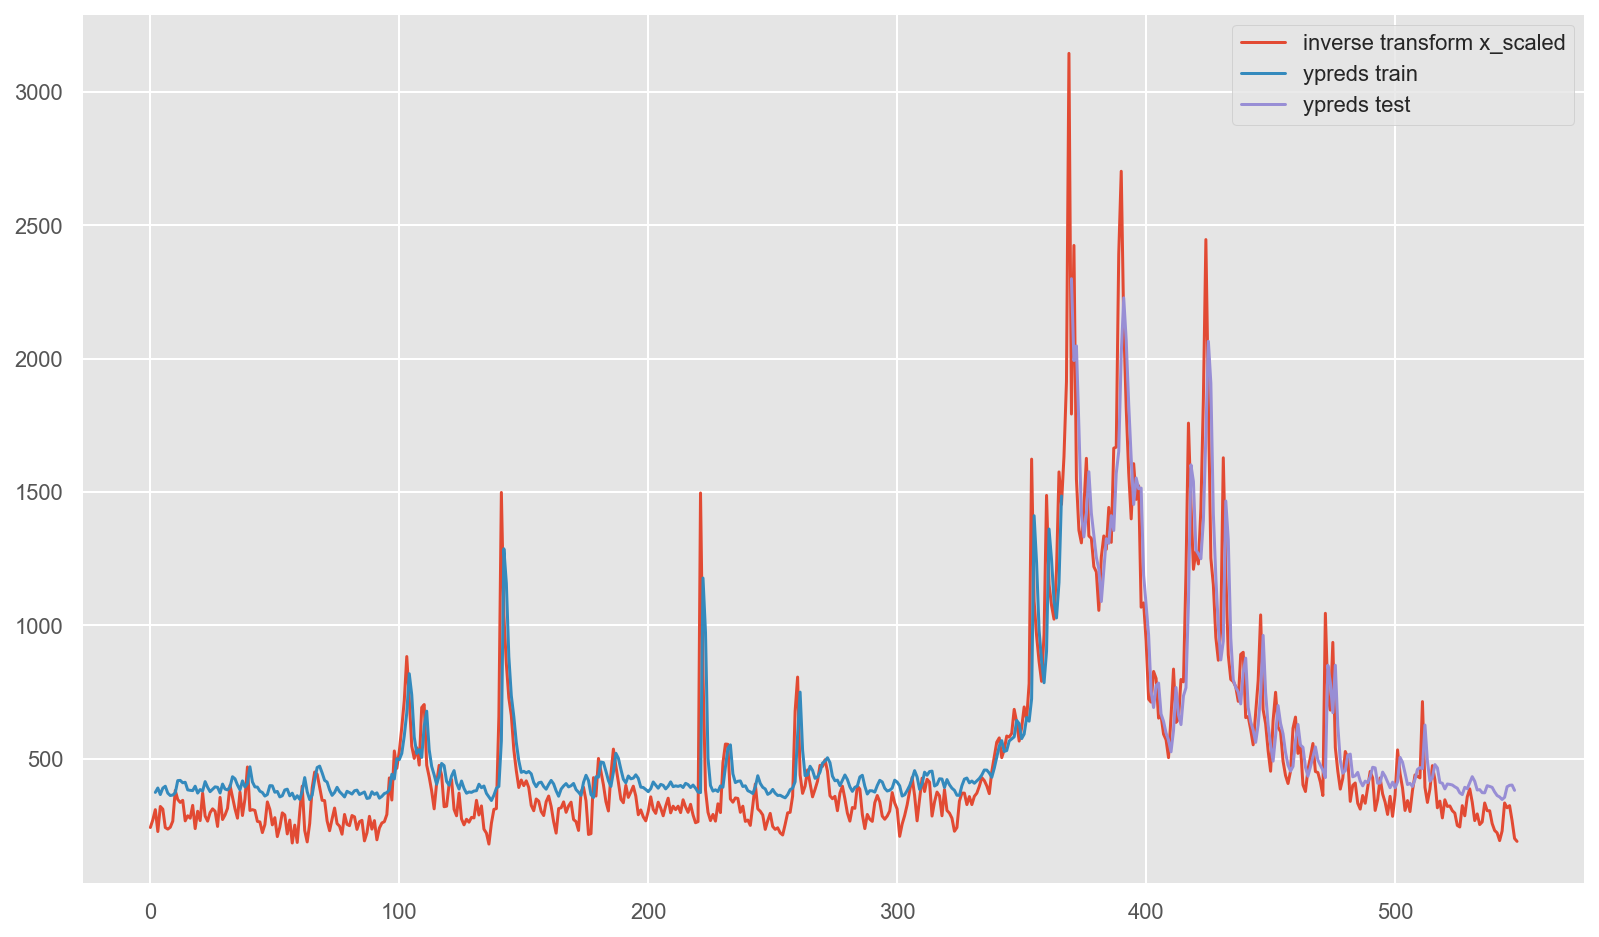

CPU times: user 2min 4s, sys: 15.9 s, total: 2min 20s
Wall time: 1min 7s


In [25]:
%%time
# parameters
np.random.seed(100)
lag = 2 # try different values 1 to 7.
units = 4
epochs = 100


# timeseries data
ts = df_sample.iloc[1,1:].astype(np.float32)
x = ts.to_numpy().reshape(-1,1)
x = x.astype('float32')  

# normalize the x
scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled = scaler.fit_transform(x)

# train test split
Xtrain,ytrain,Xtest,ytest = train_test_split_timeseries(x_scaled,lag=lag)

# reshape input to be [samples, time steps, features]
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], 1, Xtrain.shape[1]))
Xtest = np.reshape(Xtest, (Xtest.shape[0], 1, Xtest.shape[1]))

# fit the model
model = model_lstm2(Xtrain,ytrain,units=units,epochs=epochs,lag=lag)   

# preds
ypreds_train, ypreds_test = predict(model)

# model evaluation
print_rmse(scaler,ytrain,ytest,ypreds_train,ypreds_test)
print_smape(scaler,ytrain,ytest,ypreds_train,ypreds_test)

# prediction plot
prediction_plot(x_scaled,lag,ypreds_train,ypreds_test)   

## SMAPE predictions

The formula for SMAPE (Symmetric Mean Absolute Percentage Error) is given below:  

$$
S M A P E=\frac{100 \%}{n} \sum_{t=1}^{n} \frac{\left|F_{t}-A_{t}\right|}{\left(\left|A_{t}\right|+\left|F_{t}\right|\right) / 2}
$$

Where, F is forecast and A is the actual value of time series at given time t.

Python implementation:
```python
def smape(A, F):
    F = A[:len(A)]
    return ( 200.0/len(A) * np.sum(  np.abs(F - A) / 
                                  (np.abs(A) + np.abs(F) + np.finfo(float).eps))
           )
```

Despite the name Symmetric, the smape is not actually symmetric. Take this
example from [wikipedia](https://www.wikiwand.com/en/Symmetric_mean_absolute_percentage_error) for an example:

The SMAPE is not symmetric since over- and under-forecasts are not treated equally. 
This is illustrated by the following example by applying the SMAPE formula:

```
Over-forecasting: At = 100 and Ft = 110 give SMAPE = 4.76%
Under-forecasting: At = 100 and Ft = 90 give SMAPE = 5.26%.
```

In [23]:
print_smape(scaler,ytrain,ytest,ypreds_train,ypreds_test)

Train SMAPE: 26.25
Test SMAPE: 20.34
